# Preprocessing i modelowanie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys

from sklearn.model_selection import train_test_split
from preprocessing.preprocessing import preprocess_data, amenitiesColumns
from scipy.stats import skew

data = pd.read_csv('data/train.csv')

data = data[data.log_price != 0]

train_val, test = train_test_split(data, test_size = .2, random_state = 420) # test -> zbiór do finalej walidacji po wybraniu modelu

train_val.head(3)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
68899,16038487,7.073270,Other,Private room,"{""Cable TV"",Internet,""Wireless Internet"",""Whee...",2,2.0,Futon,strict,True,...,33.902953,-118.260560,Party Warehouse Spacious Industrial,NaN,0,NaN,https://a0.muscache.com/im/pictures/64461854/4...,90015,1.0,1.0
2861,1963542,4.691348,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,strict,True,...,41.884080,-87.633697,Fully Furnished 1 BDR in the loop! Chicago 3,Loop,3,87.0,NaN,60606,1.0,2.0
72304,6574537,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.5,Real Bed,strict,False,...,34.086815,-118.253330,A big room with your own entrance,Echo Park,3,100.0,https://a0.muscache.com/im/pictures/88934828-1...,90026,1.0,2.0


In [2]:
train, val = train_test_split(train_val, test_size = .2, random_state = 420)

y_train = train[['log_price']]
X_train = train[train.columns.drop('log_price')]
y_val = val[['log_price']]
X_val = val[val.columns.drop('log_price')]

In [3]:
X_train = preprocess_data(X_train)
X_val = preprocess_data(X_val, test_data = True)

In [4]:
X_train[0].shape

(193,)

In [5]:
from catboost import CatBoostRegressor
cb = CatBoostRegressor(verbose = 0)
cb.fit(X_train, y_train)
pred = cb.predict(X_val)

In [6]:
feat_imp = cb.get_feature_importance()

In [7]:
a = ['24_hour_check_in', '_smooth_pathway_to_front_door', 'accessible_height_bed', 'accessible_height_toilet', 
     'accommodates', 'air_conditioning', 'air_purifier', 'baby_bath', 'baby_monitor', 'babysitter_recommendations', 
     'bathrooms', 'bathtub', 'bathtub_with_shower_chair', 'bbq_grill', 'beach_essentials', 'beachfront', 'bed_linens', 
     'bed_type', 'bedrooms', 'beds', 'breakfast', 'buzzer_wireless_intercom', 'cable_tv', 'cancellation_policy', 
     'carbon_monoxide_detector', 'cat_s_', 'changing_table', 'children’s_books_and_toys', 'children’s_dinnerware', 
     'city', 'cleaning_before_checkout', 'cleaning_fee', 'coffee_maker', 'cooking_basics', 'crib', 'disabled_parking_spot', 
     'dishes_and_silverware', 'dishwasher', 'dog_s_', 'doorman', 'doorman_entry', 'dryer', 'elevator', 'elevator_in_building', 
     'essentials', 'ethernet_connection', 'ev_charger', 'extra_pillows_and_blankets', 'family_kid_friendly', 
     'fire_extinguisher', 'fireplace_guards', 'firm_mattress', 'first_aid_kit', 'first_review_month', 'first_review_year', 
     'fixed_grab_bars_for_shower___toilet', 'flat', 'flat_smooth_pathway_to_front_door', 'free_parking_on_premises', 
     'free_parking_on_street', 'game_console', 'garden_or_backyard', 'grab_rails_for_shower_and_toilet', 
     'ground_floor_access', 'gym', 'hair_dryer', 'handheld_shower_head', 'hangers', 'heating', 'high_chair', 
     'host_greets_you', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since_month', 
     'host_since_year', 'hot_tub', 'hot_water', 'hot_water_kettle', 'indoor_fireplace', 'instant_bookable', 'internet',
     'iron', 'keypad', 'kitchen', 'lake_access', 'laptop_friendly_workspace', 'last_review_month', 'last_review_year', 
     'latitude', 'lock_on_bedroom_door', 'lockbox', 'long_term_stays_allowed', 'longitude', 'luggage_dropoff_allowed', 
     'microwave', 'number_of_reviews', 'other', 'other_pet_s_', 'outlet_covers', 'oven', 'pack_’n_play_travel_crib',
     'paid_parking_off_premises', 'path_to_entrance_lit_at_night', 'patio_or_balcony', 'pets_allowed', 
     'pets_live_on_this_property', 'pocket_wifi', 'pool', 'private_bathroom', 'private_entrance', 'private_living_room', 
     'property_type', 'refrigerator', 'review_scores_rating', 'roll_in_shower_with_chair', 'room_darkening_shades', 
     'room_type', 'safety_card', 'self_check_in', 'shampoo', 'single_level_home', 'ski_in_ski_out', 'smart_lock', 
     'smartlock', 'smoke_detector', 'smoking_allowed', 'stair_gates', 'step_free_access', 'stove', 'suitable_for_events', 
     'table_corner_guards', 'translation_missing__en_hosting_amenity_49', 'translation_missing__en_hosting_amenity_50', 
     'tv', 'washer', 'washer___dryer', 'waterfront', 'well_lit_path_to_entrance', 'wheelchair_accessible', 
     'wide_clearance_to_bed', 'wide_clearance_to_shower___toilet', 'wide_clearance_to_shower_and_toilet', 'wide_doorway',
     'wide_entryway', 'wide_hallway_clearance', 'window_guards', 'wireless_internet'] # lista ze wszystkimi wartościami 
     # z przekształconej kolumny amenieties


b = ['knn__bathrooms', 'knn__beds', 'knn__bedrooms', 'knn__host_response_rate', 'iter__review_scores_rating', 
     'ord_enc__cancellation_policy', 'ord_enc__cleaning_fee', 'ord_enc__host_has_profile_pic', 
     'ord_enc__host_identity_verified', 'ord_enc__instant_bookable', 'one_hot__x0_Entire home/apt', 
     'one_hot__x0_Private room', 'one_hot__x0_Shared room', 'one_hot__x1_Airbed', 'one_hot__x1_Couch',
     'one_hot__x1_Futon', 'one_hot__x1_Pull-out Sofa', 'one_hot__x1_Real Bed', 'one_hot__x2_Boston', 
     'one_hot__x2_Chicago', 'one_hot__x2_DC', 'one_hot__x2_LA', 'one_hot__x2_NYC', 'one_hot__x2_SF', 
     'one_hot__x3_Apartment', 'one_hot__x3_Bed & Breakfast', 'one_hot__x3_Boat', 'one_hot__x3_Boutique hotel', 
     'one_hot__x3_Bungalow', 'one_hot__x3_Cabin', 'one_hot__x3_Camper/RV', 'one_hot__x3_Casa particular', 
     'one_hot__x3_Castle', 'one_hot__x3_Cave', 'one_hot__x3_Chalet', 'one_hot__x3_Condominium', 'one_hot__x3_Dorm', 
     'one_hot__x3_Earth House', 'one_hot__x3_Guest suite', 'one_hot__x3_Guesthouse', 'one_hot__x3_Hostel',
     'one_hot__x3_House', 'one_hot__x3_Hut', 'one_hot__x3_In-law', 'one_hot__x3_Island', 'one_hot__x3_Lighthouse',
     'one_hot__x3_Loft', 'one_hot__x3_Other', 'one_hot__x3_Parking Space', 'one_hot__x3_Serviced apartment', 
     'one_hot__x3_Tent', 'one_hot__x3_Timeshare', 'one_hot__x3_Tipi', 'one_hot__x3_Townhouse', 'one_hot__x3_Train',
     'one_hot__x3_Treehouse', 'one_hot__x3_Vacation home', 'one_hot__x3_Villa', 'one_hot__x3_Yurt']
    # kolumny po preprocessingu (bez kolumn, które nie brały udziału w preprocessingu)
    
    
a_new = [] # lista, która ma przechowywać kolumny, które nie brały udziału w preprocessingu

tmp = ['room_type', 'bed_type', 'city', 'property_type', 'bathrooms', 'beds', 'bedrooms', 
       'host_response_rate', 'review_scores_rating', 'cancellation_policy', 'cleaning_fee', 
       'host_has_profile_pic', "host_identity_verified", 'instant_bookable']
        # kolumny, brały udziału w preprocessingu

for el in a:
    if el not in tmp:
        a_new.append(el)
print('a: ' + str(len(a)))
c = b + a_new
print('c: ' + str(len(c)))

a: 148
c: 193


In [8]:
X_train = pd.DataFrame(X_train, columns = c)

In [9]:
X_val = pd.DataFrame(X_val, columns = c)

## Wpływ poszczególnych kolumn na predykcyjność modelu (CatBoost)

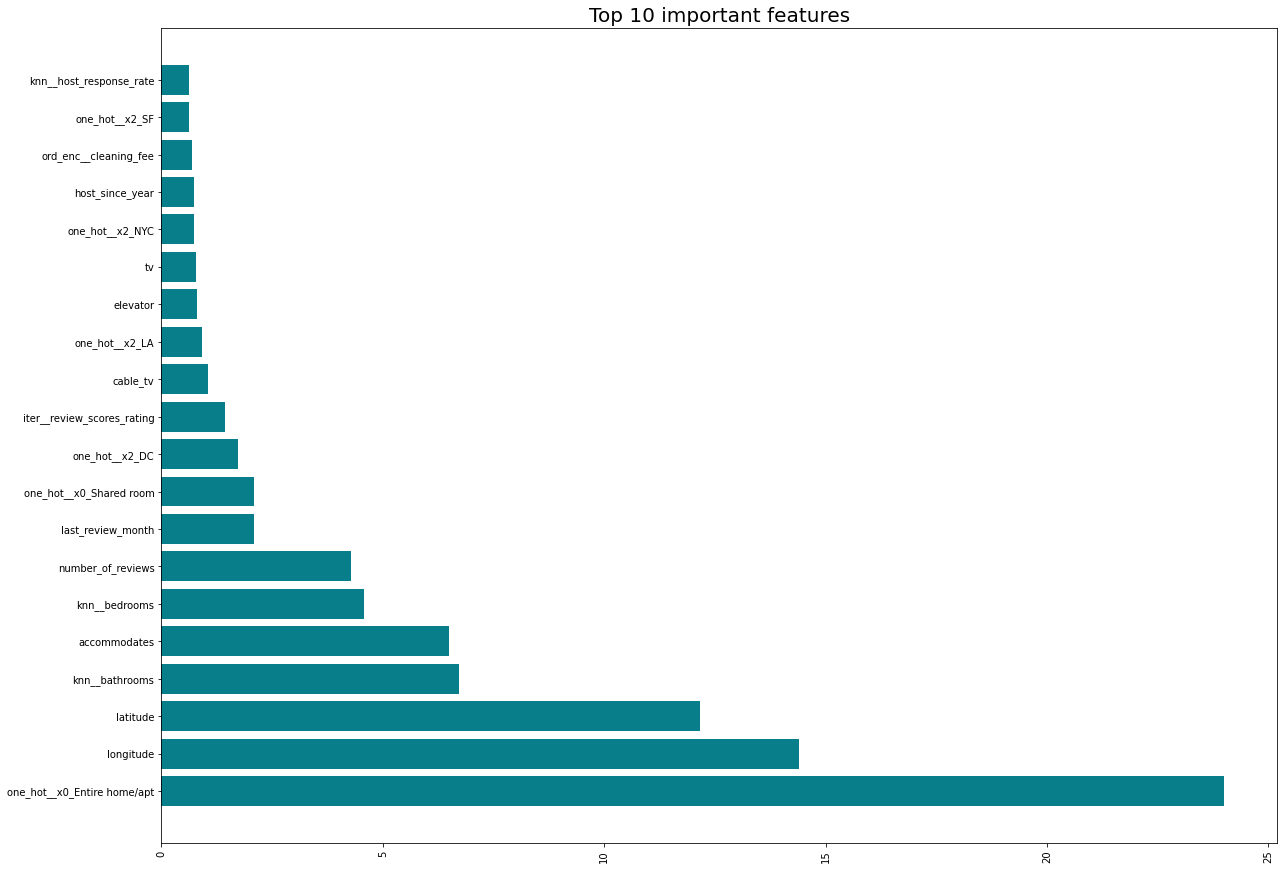

In [10]:
importances = pd.DataFrame(data={
    'name': c,
    'importance': feat_imp
})

importances = importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(20,15))
plt.barh(y=importances['name'][:20], width=importances['importance'][:20], color='#087E8B')
plt.title('Top 10 important features', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Usunięcie kolumn silnie skorelowanych z mniejszą predykcyjnością dla modelu

In [11]:
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

def col_to_drop(dataset, upper):
    to_drop = []
    for column in upper.columns:
        if any(upper[column] > .9):
            correlated = upper[upper[column] > .9].index
            for col in correlated:
                if dataset[dataset['name'] == col]['importance'].values[0] < dataset[dataset['name'] == column]['importance'].values[0]:
                    to_drop.append(col)
                else:
                    to_drop.append(column)
    return to_drop

to_drop = col_to_drop(importances, upper)

In [12]:
X_train.drop(to_drop, axis=1, inplace=True)
X_val.drop(to_drop, axis=1, inplace=True)

In [13]:
X_train.shape

(47430, 184)

In [14]:
X_val.shape

(11858, 184)

## Redukcja skośności

In [15]:
features = list(X_train.select_dtypes('float64').columns)

high_skewness = []

In [16]:
for el in features:
    if skew(X_train[el]) > 1.5:
        high_skewness.append(el)

In [17]:
X_train[high_skewness] = np.log2(X_train[high_skewness] + sys.float_info.epsilon)
X_val[high_skewness] = np.log2(X_val[high_skewness] + sys.float_info.epsilon)

# Regresja liniowa

In [18]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predictions = linreg.predict(X_train)

print('Training data: ')
print(f"MAE: {mean_absolute_error(y_train, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_train, predictions, squared=False):.3}")
print(f"R2 score: {r2_score(y_train, predictions):.3}")


predictions = linreg.predict(X_val)

print('\nValidation data: ')
print(f"MAE: {mean_absolute_error(y_val, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_val, predictions, squared=False):.3}")
print(f"R2 score: {r2_score(y_val, predictions):.3}")

Training data: 
MAE: 0.343
RMSE: 0.457
R2 score: 0.592

Validation data: 
MAE: 0.343
RMSE: 0.454
R2 score: 0.602


# XGBRegressor

In [20]:
import xgboost as xgb

In [21]:
xgbreg = xgb.XGBRegressor()

xgbreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
predictions = xgbreg.predict(X_train)

print('Training data: ')
print(f"MAE: {mean_absolute_error(y_train, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_train, predictions, squared=False):.3}")
print(f"R2 score: {r2_score(y_train, predictions):.3}")


predictions = xgbreg.predict(X_val)

print('\nValidation data: ')
print(f"MAE: {mean_absolute_error(y_val, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_val, predictions, squared=False):.3}")
print(f"R2 score: {r2_score(y_val, predictions):.3}")

Training data: 
MAE: 0.231
RMSE: 0.314
R2 score: 0.807

Validation data: 
MAE: 0.273
RMSE: 0.375
R2 score: 0.729


# Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
predictions = rfr.predict(X_train)

print('Training data: ')
print(f"MAE: {mean_absolute_error(y_train, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_train, predictions, squared=False):.3}")
print(f"R2 score: {r2_score(y_train, predictions):.3}")


predictions = rfr.predict(X_val)

print('\nValidation data: ')
print(f"MAE: {mean_absolute_error(y_val, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_val, predictions, squared=False):.3}")
print(f"R2 score: {r2_score(y_val, predictions):.3}")

Training data: 
MAE: 0.104
RMSE: 0.145
R2 score: 0.959

Validation data: 
MAE: 0.276
RMSE: 0.382
R2 score: 0.719


# CatBoost

In [25]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ctboost = CatBoostRegressor(iterations = 5000, learning_rate = 0.03, 
                            task_type = 'GPU', verbose = 0)

ctboost.fit(X_train, y_train)

In [26]:
predictions = ctboost.predict(X_train)

print('Training data: ')
print(f"MAE: {mean_absolute_error(y_train, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_train, predictions, squared=False):.3}")
print(f"R2 score: {r2_score(y_train, predictions):.3}")


predictions = ctboost.predict(X_val)

print('\nValidation data: ')
print(f"MAE: {mean_absolute_error(y_val, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_val, predictions, squared=False):.3}")
print(f"R2 score: {r2_score(y_val, predictions):.3}")

Training data: 
MAE: 0.254
RMSE: 0.351
R2 score: 0.76

Validation data: 
MAE: 0.268
RMSE: 0.369
R2 score: 0.737


# HPO - Optymalizacja bayesowska

In [27]:
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer

In [28]:
def report_perf(optimizer, X, y, title="model", callbacks=None):
    start = time()
    
    if callbacks is not None:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
        
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           + u"\u00B1"+" %.3f") % (time() - start, 
                                   len(optimizer.cv_results_['params']),
                                   best_score,
                                   best_score_std))    
    print('Best parameters:')
    print(best_params)
    print()
    return best_params

In [29]:
from sklearn.metrics import make_scorer
from functools import partial

scoring = make_scorer(partial(mean_squared_error, squared=False), 
                      greater_is_better=False)

In [30]:
from sklearn.model_selection import KFold

skf = KFold(n_splits=5, 
                      shuffle=True, 
                      random_state=0)

cv_strategy = list(skf.split(X_train, y_train))

In [31]:
# Setting the search space
regression_loss_funcs = ['RMSE']

search_spaces = {
    'loss_function': Categorical(regression_loss_funcs),
    'iterations': Integer(10, 2000),
    'depth': Integer(1, 12),
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'random_strength': Real(1e-9, 10, 'log-uniform'),
    'bagging_temperature': Real(0.0, 1.0),
    'l2_leaf_reg': Integer(2, 100) 
   }

In [32]:
reg = CatBoostRegressor(verbose = False, od_type='Iter')

opt = BayesSearchCV(estimator=reg,                                    
                    search_spaces=search_spaces,                      
                    scoring=scoring,                                  
                    cv=cv_strategy,                                           
                    n_iter=30,                                       
                    n_points=3,                                      
                    n_jobs=-1,                                       
                    iid=False,                                        
                    return_train_score=False,                         
                    refit=False,                                      
                    optimizer_kwargs={'base_estimator': 'GP'},        
                    random_state=0)                                  

In [33]:
from time import time

overdone_control = DeltaYStopper(delta=0.0001)             
time_limit_control = DeadlineStopper(total_time=60 * 60) 

best_params = report_perf(opt, X_train, y_train, 'CatBoost_regression', 
                          callbacks=[overdone_control, time_limit_control])

CatBoost_regression took 3011.73 seconds,  candidates checked: 24, best CV score: -0.372 ± 0.003
Best parameters:
OrderedDict([('bagging_temperature', 0.2692181774394163), ('depth', 9), ('iterations', 2000), ('l2_leaf_reg', 100), ('learning_rate', 0.14321810455831835), ('loss_function', 'RMSE'), ('random_strength', 10.0)])



In [34]:
best_params

OrderedDict([('bagging_temperature', 0.2692181774394163),
             ('depth', 9),
             ('iterations', 2000),
             ('l2_leaf_reg', 100),
             ('learning_rate', 0.14321810455831835),
             ('loss_function', 'RMSE'),
             ('random_strength', 10.0)])

In [35]:
reg = CatBoostRegressor(verbose = False,
                        **best_params)

# Spradzenie dla zbioru walidacyjnego

In [37]:
reg.fit(X_train, y_train)

In [93]:
predictions = reg.predict(X_train)
print('Training data: ')
print(f"- MAE: {mean_absolute_error(y_train, predictions):.3}")
print(f"- RMSE: {mean_squared_error(y_train, predictions, squared=False):.3}")
print(f"- R2 score: {r2_score(y_train, predictions):.3}")

predictions = reg.predict(X_val)
print('\nValidation data: ')
print(f"- MAE: {mean_absolute_error(y_val, predictions):.3}")
print(f"- RMSE: {mean_squared_error(y_val, predictions, squared=False):.3}")
print(f"- R2 score: {r2_score(y_val, predictions):.3}")

Training data: 
- MAE: 0.206
- RMSE: 0.282
- R2 score: 0.844

Validation data: 
- MAE: 0.264
- RMSE: 0.364
- R2 score: 0.745


Model osiąga najlepsze wyniki dla zbioru walidacyjnego dotychczas, dlatego też postanowiliśmy wziąć go jako nasz finalny model.

# Sprawdzenie dla niezależnego zbioru testowego

In [36]:
y_test = test[['log_price']]
X_test = test[test.columns.drop('log_price')]

X_test = preprocess_data(X_test, test_data = True)
X_test = pd.DataFrame(X_test, columns = c)
X_test.drop(to_drop, axis=1, inplace=True)
X_test[high_skewness] = np.log2(X_test[high_skewness] + sys.float_info.epsilon)

In [37]:
reg.fit(X_train, y_train)

In [38]:
predictions = reg.predict(X_test)

print('Training data: ')
print(f"- MAE: {mean_absolute_error(y_train, predictions):.3}")
print(f"- RMSE: {mean_squared_error(y_train, predictions, squared=False):.3}")
print(f"- R2 score: {r2_score(y_train, predictions):.3}")

print("\nFinalne wyniki: ")
print(f"- MAE: {mean_absolute_error(y_test, predictions):.3}")
print(f"- RMSE: {mean_squared_error(y_test, predictions, squared=False):.3}")
print(f"- R2 score: {r2_score(y_test, predictions):.3}")

Training data: 
- MAE: 0.206
- RMSE: 0.282
- R2 score: 0.844

Finalne wyniki: 
- MAE: 0.268
- RMSE: 0.376
- R2 score: 0.727


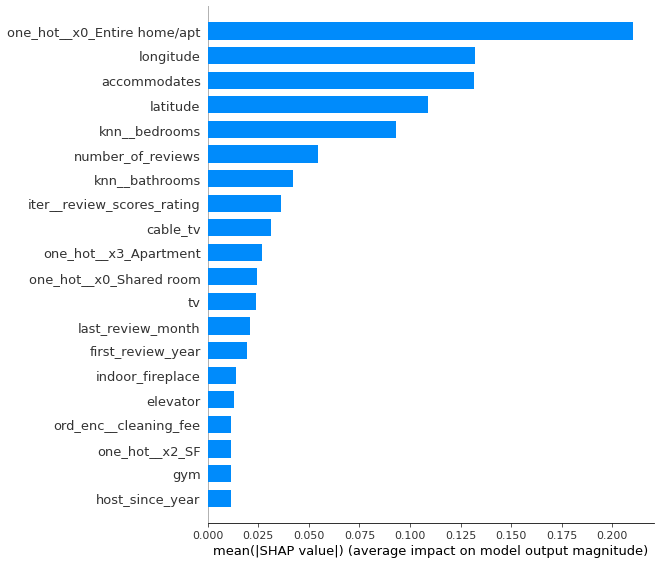

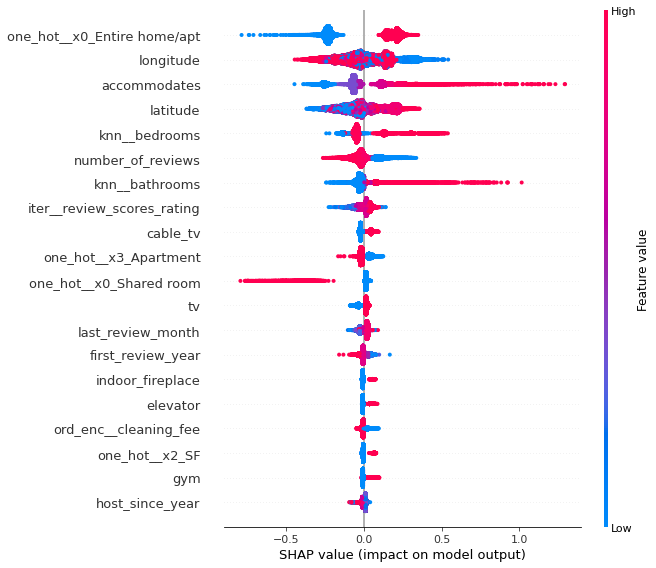

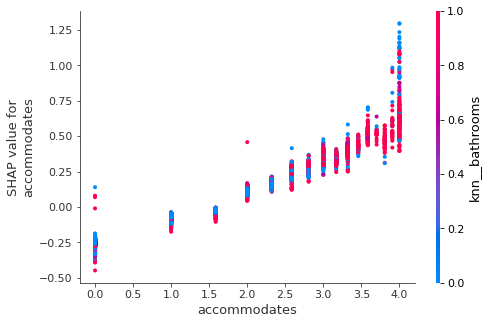

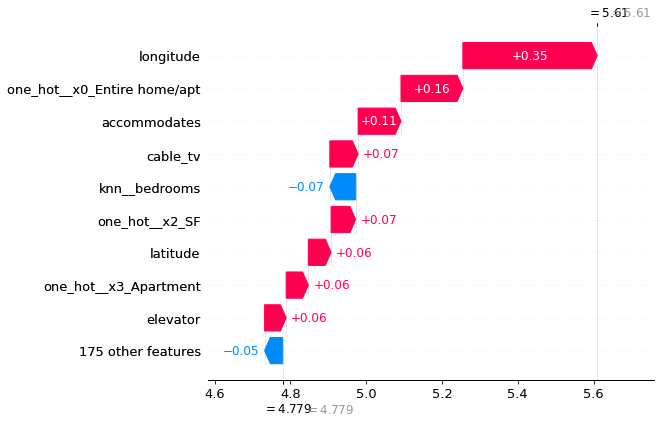

In [39]:
import shap
explainer = shap.TreeExplainer(ctboost)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)

shap.dependence_plot("accommodates", shap_values, X_train)

X_output = X_val.copy()
X_output.loc[:,'predict'] = np.round(ctboost.predict(X_output),2)

random_picks = np.arange(1, 330, 50)
S = X_output.iloc[random_picks]

def shap_plot(j):
    explainerModel = shap.TreeExplainer(ctboost)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

shap.initjs()
shap_plot(3)

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[2137], feature_names=X_train.columns)

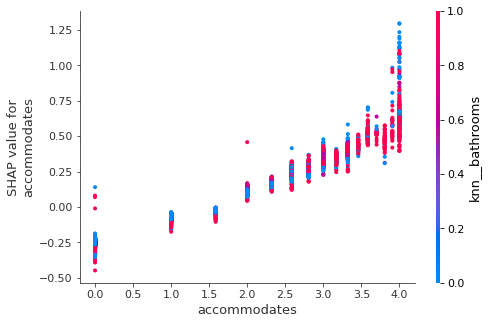

In [41]:
shap.dependence_plot("accommodates", shap_values, X_train)

In [42]:
X_output = X_val.copy()
X_output.loc[:,'predict'] = np.round(ctboost.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,330,50)
S = X_output.iloc[random_picks]

def shap_plot(j):
    explainerModel = shap.TreeExplainer(ctboost)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [43]:
shap.initjs()
shap_plot(3)

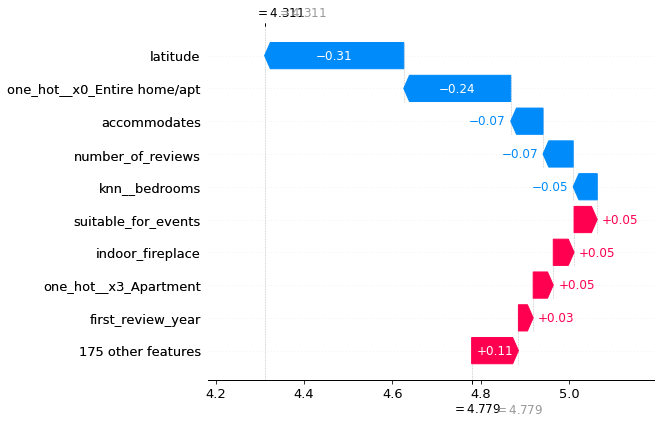

In [44]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[111], feature_names=X_train.columns)

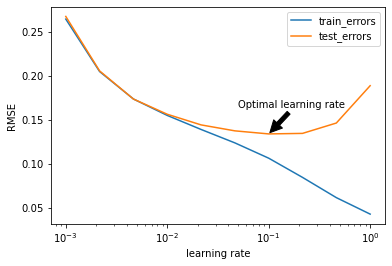

In [45]:
rates = np.logspace(-3, 0, num=10)
train_errors = list()
test_errors = list()
for lr in rates:
    ctb = CatBoostRegressor(learning_rate = lr, verbose=0)
    ctb.fit(X_train, y_train)
    preds_val = ctb.predict(X_val)
    preds_train = ctb.predict(X_train)
    train_errors.append(mean_squared_error(y_train, preds_train))
    test_errors.append(mean_squared_error(y_val, preds_val))
plt.plot(rates, train_errors , label = "train_errors")
plt.plot(rates, test_errors, label = "test_errors")
min_err = min(test_errors)
opt_rate = rates[np.where(test_errors == min_err)]
plt.annotate(
'Optimal learning rate', xy=(opt_rate, min_err), xytext=(opt_rate - 0.05, min_err + 0.03),
arrowprops=dict(facecolor='black', shrink=0.05))
plt.xscale('log')
plt.xlabel('learning rate')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Wykresy podsumowywujące wyniki

In [90]:
pred = ctboost.predict(X_test)

print('Test data: ')
print(f"MAE: {mean_absolute_error(y_test, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_test, predictions, squared=False):.3}")
print(f"R2 score: {r2_score(y_test, predictions):.3}")

Test data: 
MAE: 0.267
RMSE: 0.374
R2 score: 0.73


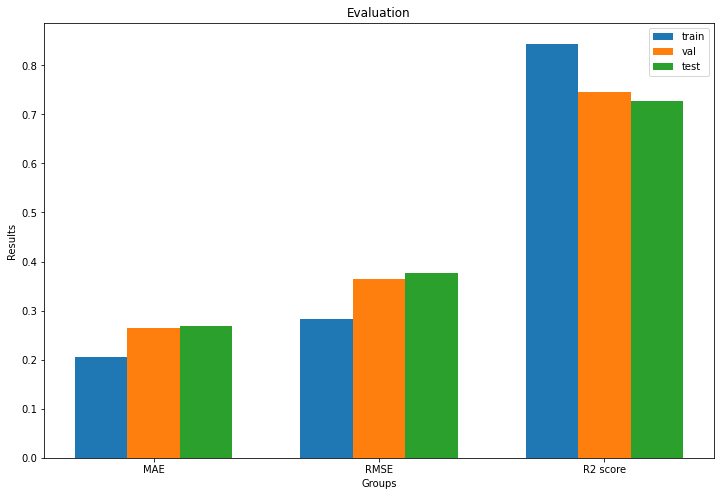

In [94]:
grp = ['MAE', 'RMSE', 'R2 score']
train = [0.206, 0.282, 0.844]
val = [0.264, 0.364, 0.745]
test = [0.268, 0.376, 0.727]

X_axis = np.arange(0, 7, 3)

plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.7, train, 0.7, label = 'train')
plt.bar(X_axis, val, 0.7, label = 'val')
plt.bar(X_axis + 0.7, test, 0.7, label = 'test')

plt.xticks(X_axis, grp)
plt.xlabel("Groups")
plt.ylabel("Results")
plt.title("Evaluation")
plt.legend()
plt.show()

# Podsumowanie

Najlepszym modelem okazał sie **CatBoost**, który świetnie radzi sobie z dużą ilością kategori. Pierwonie bez optymalizacji hiperparametrów radził sobie bardzo dobrze, lecz udało nam się poprawić jego wyniki dzięki zastosowanie optymalizacji bayesowskiej.

Finalne wyniki jakie otrzymaliśmy dla niezależnego zbioru testowego to:
- MAE: 0.268
- RMSE: 0.376
- R2 score: 0.727